#**Lecture 11**

##**Principal Component Analysis**

In [5]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

###Read the Iris Dataset

In [6]:
import sys
from google.colab import files
import io
uploaded = files.upload()


# import iris data set
df = pd.read_csv("iris.csv")
df.head()

Saving iris.csv to iris (1).csv


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values


###Step 1 - Standardize Data

In [8]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

#Step 2-5 - Get the Final Dataset
Run the PCA with 2 principal components

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [10]:
pca.explained_variance_ratio_ # array([0.72770452, 0.23030523])

array([0.72770452, 0.23030523])

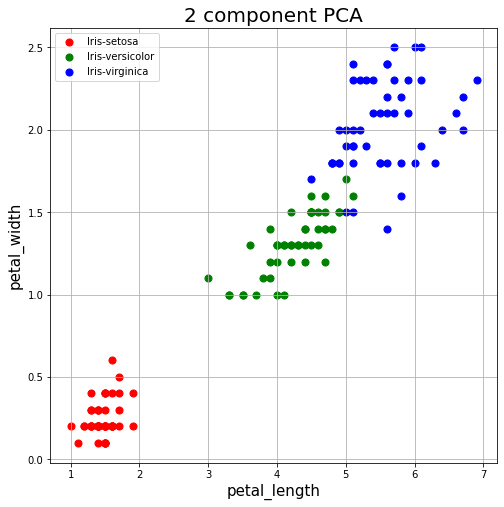

In [11]:
# before PCA
selected_feat1 = "petal_length"
selected_feat2 = "petal_width"

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(selected_feat1, fontsize = 15)
ax.set_ylabel(selected_feat2, fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, selected_feat1]
               , df.loc[indicesToKeep, selected_feat2]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

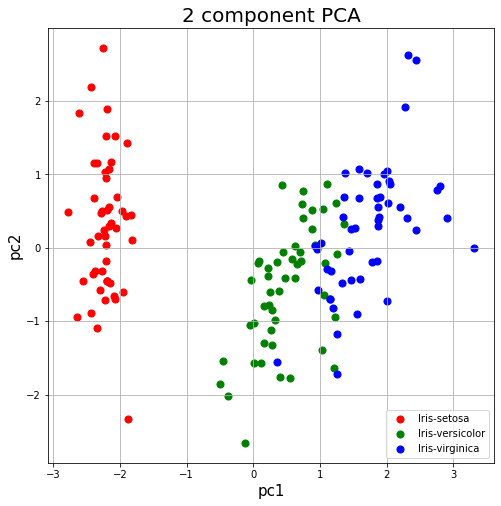

In [12]:
# after PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()